In [2]:
! pip install lightgbm shap xgboost


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Online_Dating_Behavior_Dataset.csv')
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


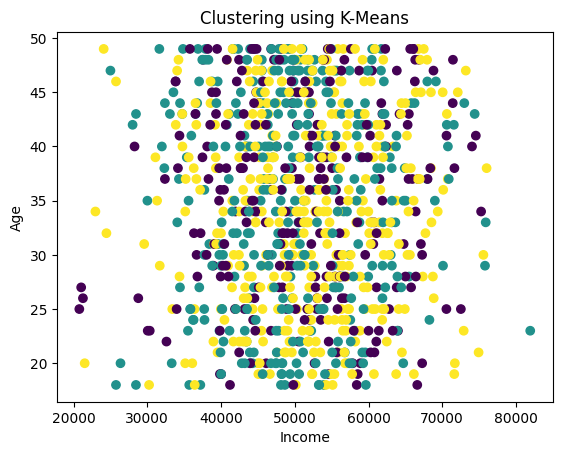

     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Cluster  
0          1  
1          2  
2          0  
3          0  


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Online_Dating_Behavior_Dataset.csv')

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=0, Female=1
df['PurchasedVIP'] = label_encoder.fit_transform(df['PurchasedVIP'])  # Yes=1, No=0

X = df[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness', 'Matches']]

scaler = StandardScaler()
X[['Income', 'Age', 'Attractiveness', 'Matches']] = scaler.fit_transform(X[['Income', 'Age', 'Attractiveness', 'Matches']])

kmeans = KMeans(n_clusters=3, random_state=42)  # You can change n_clusters to suit your needs
df['Cluster'] = kmeans.fit_predict(X)

plt.scatter(df['Income'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Clustering using K-Means')
plt.show()

print(df[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness', 'Matches', 'Cluster']])


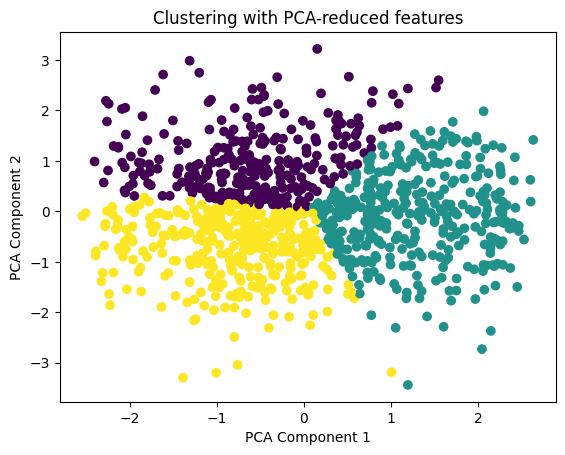

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reducing dimensions using PCA (2 components for visualization)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

# Visualizing the PCA-reduced data with clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering with PCA-reduced features')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 100.00%


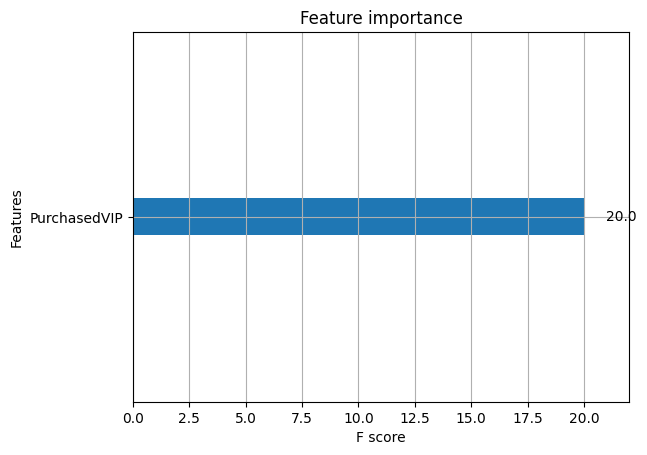

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

df = pd.read_csv('Online_Dating_Behavior_Dataset.csv')

# Data Preprocessing
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=0, Female=1
df['PurchasedVIP'] = label_encoder.fit_transform(df['PurchasedVIP'])  # Yes=1, No=0

X = df[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness', 'Matches']]  # Features
y = df['PurchasedVIP']  # Target

scaler = StandardScaler()
X[['Income', 'Age', 'Attractiveness', 'Matches']] = scaler.fit_transform(X[['Income', 'Age', 'Attractiveness', 'Matches']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


[LightGBM] [Info] Number of positive: 337, number of negative: 363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481429 -> initscore=-0.074320
[LightGBM] [Info] Start training from score -0.074320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


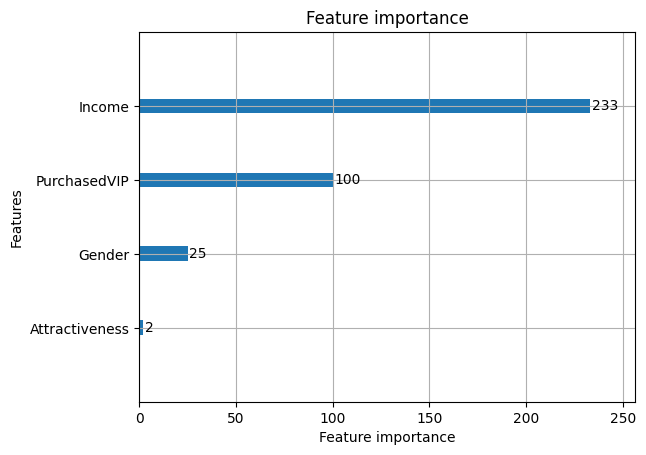

In [12]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset is loaded into `df`
df = pd.read_csv('Online_Dating_Behavior_Dataset.csv')

# Data Preprocessing
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=0, Female=1
df['PurchasedVIP'] = label_encoder.fit_transform(df['PurchasedVIP'])  # Yes=1, No=0

# Select features and target
X = df[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness', 'Matches']]  # Features
y = df['PurchasedVIP']  # Target

# Scaling numerical features
scaler = StandardScaler()
X[['Income', 'Age', 'Attractiveness', 'Matches']] = scaler.fit_transform(X[['Income', 'Age', 'Attractiveness', 'Matches']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LightGBM Classifier
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Feature Importance
import matplotlib.pyplot as plt
lgb.plot_importance(model)
plt.show()


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       137

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Accuracy: 100.00%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:36:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


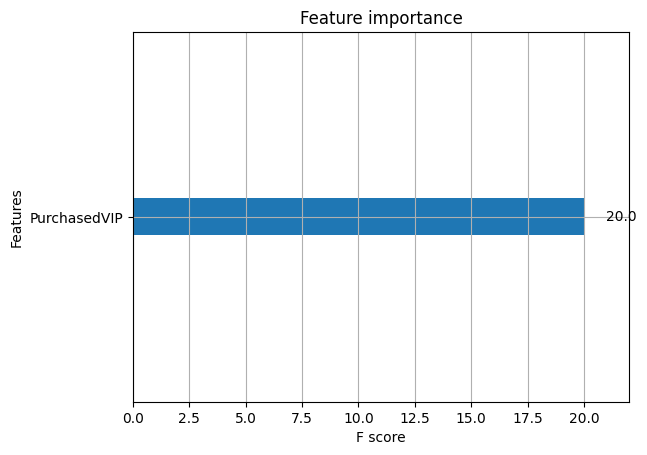

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

df = pd.read_csv('Online_Dating_Behavior_Dataset.csv')


label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=0, Female=1
df['PurchasedVIP'] = label_encoder.fit_transform(df['PurchasedVIP'])  # Yes=1, No=0

X = df[['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness', 'Matches']]  # Features
y = df['PurchasedVIP']  # Target: Predicting whether the person has purchased VIP (binary)

scaler = StandardScaler()
X[['Income', 'Age', 'Attractiveness', 'Matches']] = scaler.fit_transform(X[['Income', 'Age', 'Attractiveness', 'Matches']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()


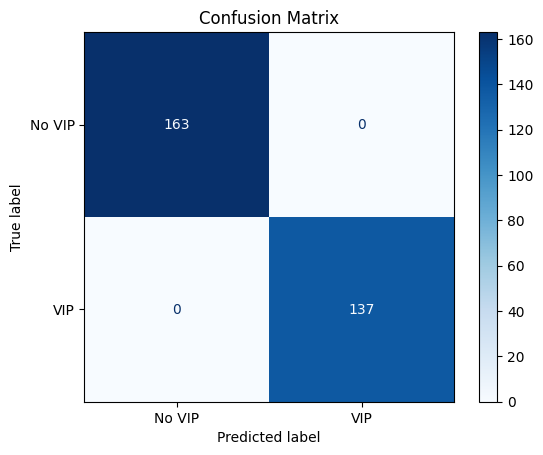

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No VIP", "VIP"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


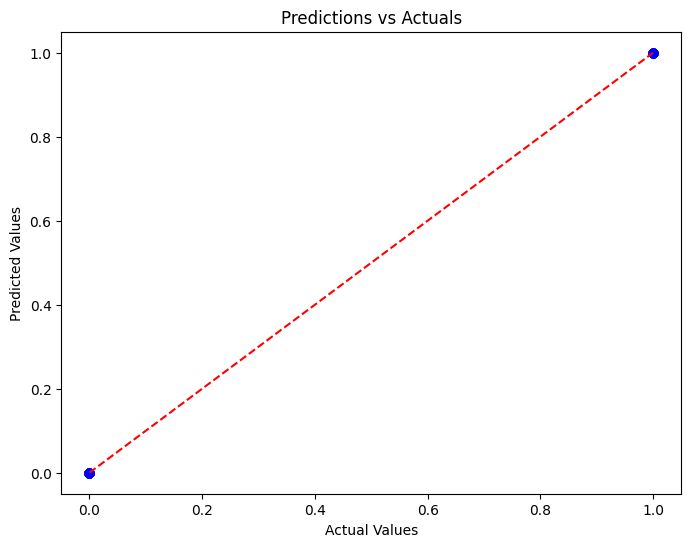

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs Actuals")
plt.show()


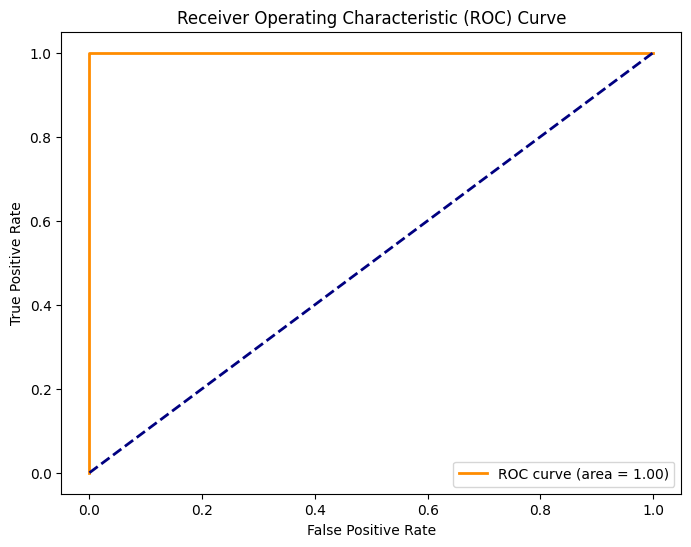

In [19]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


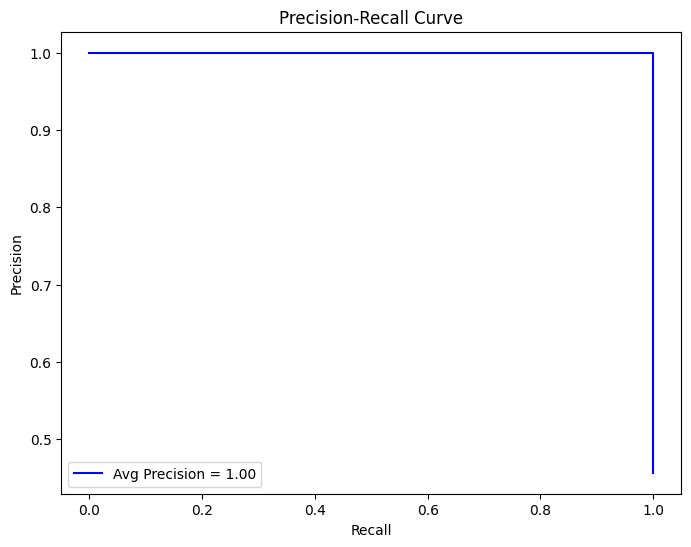

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f"Avg Precision = {average_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()


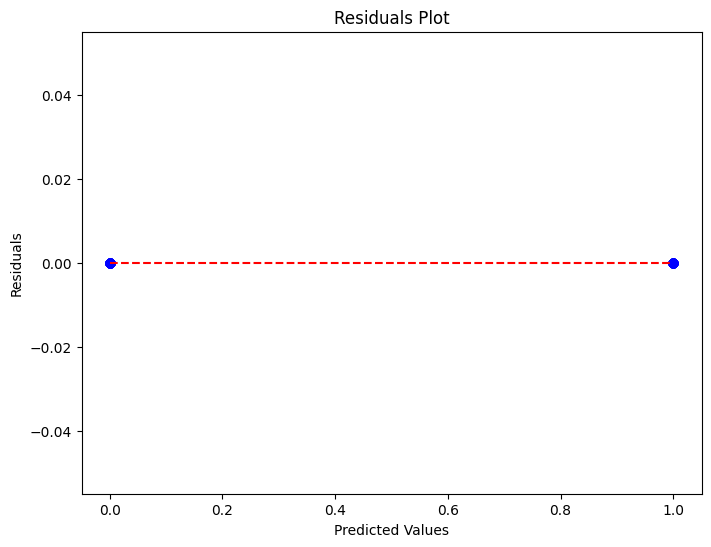

In [21]:
# Residuals plot for regression
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


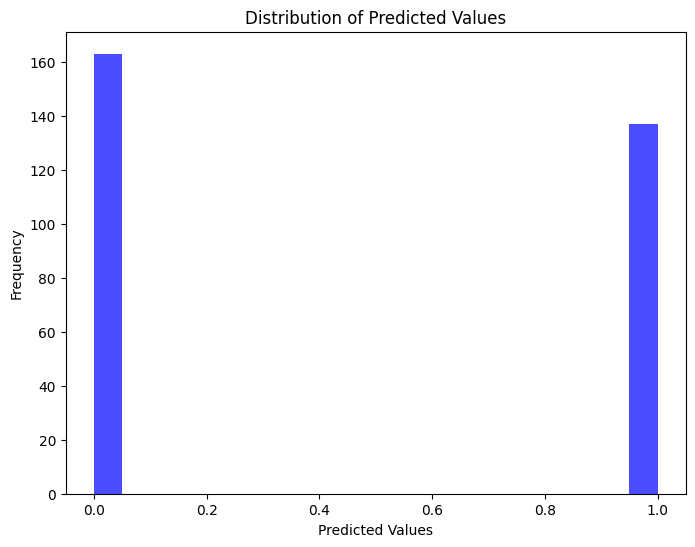

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='blue', alpha=0.7)
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Values")
plt.show()


In [26]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
model.save_model('xgboost_model.json')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:41:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
import gradio as gr
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

model = xgb.XGBClassifier()
model.load_model('xgboost_model.json')  # Load the saved model

label_encoder = LabelEncoder()
scaler = StandardScaler()

columns = ['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness', 'Matches']

def preprocess_input(data):
    input_df = pd.DataFrame([data], columns=columns)

    input_df['Gender'] = label_encoder.fit_transform(input_df['Gender'])
    input_df['PurchasedVIP'] = label_encoder.fit_transform(input_df['PurchasedVIP'])

    input_df[['Income', 'Age', 'Attractiveness', 'Matches']] = scaler.fit_transform(input_df[['Income', 'Age', 'Attractiveness', 'Matches']])

    return input_df

def predict(data):
    processed_data = preprocess_input(data)
    prediction = model.predict(processed_data)
    return "VIP" if prediction == 1 else "No VIP"

inputs = [
    gr.Radio(choices=["Male", "Female"], label="Gender", value="Male"),
    gr.Radio(choices=["Yes", "No"], label="PurchasedVIP", value="No"),
    gr.Slider(minimum=0, maximum=100000, label="Income", value=50000),
    gr.Slider(minimum=0, maximum=10, label="Children", value=0),
    gr.Slider(minimum=18, maximum=100, label="Age", value=30),
    gr.Slider(minimum=0, maximum=10, label="Attractiveness", value=5),
    gr.Slider(minimum=0, maximum=100, label="Matches", value=10)
]

outputs = gr.Textbox(label="Prediction (VIP or No VIP)")

gr.Interface(fn=predict, inputs=inputs, outputs=outputs, live=False, title="Girlfriend Predictor", description="Enter the details to predict if the person will purchase VIP membership").launch()


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1017: UserWarning: Expected 1 arguments for function <function predict at 0x7862bc672160>, received 7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1025: UserWarning: Expected maximum 1 arguments for function <function predict at 0x7862bc672160>, received 7.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b75dc1329655fbc534.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
